# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [2]:
#Import and Load
import pandas as pd
import numpy as np

## Load the data into a DataFrame
djs = pd.read_csv('/Users/pivit/DSI-NYC-2/projects/projects-weekly/project-03/starter-code/Iowa_Liquor_sales_sample_10pct.csv', encoding='latin-1')
djs.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/4/15,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,3/2/16,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2/11/16,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [3]:
##Converting to Floats

djs['State Bottle Cost'] = (djs['State Bottle Cost'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))
djs['State Bottle Retail'] = (djs['State Bottle Retail'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))
djs['Sale (Dollars)'] = (djs['Sale (Dollars)'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))
djs['Profit'] = djs['Sale (Dollars)'] - (djs['State Bottle Cost'] * djs['Bottles Sold'])
djs['Profit Per Liter Sold'] = djs['Profit'] / djs['Volume Sold (Liters)']


In [4]:
#Transform the dates if needed, e.g.
djs['Date'] = pd.to_datetime(djs["Date"])

In [5]:
djs['City'] = map(lambda x: x.upper(), djs['City'])

In [6]:
# djs['County'].unique()

In [ ]:
##Total Sales by Zip Code
djs_by_location = djs.groupby(['County', 'City', 'Zip Code'])['Sale (Dollars)'].agg(([np.sum]))


In [8]:
# ##Total Profit by Item
# djs_profit_by_item = djs.groupby(['Category Name'])['Profit'].agg(([np.mean]))
# djsitem = djs_profit_by_item
# djsitem.sort_values('mean', ascending= False)

In [9]:
##Total Sales by Store in Each County
djs_by_store = djs.groupby(['County', 'Store Number'])['Sale (Dollars)'].agg(([np.sum]))
djs_by_store.sort_values('sum', ascending= False)
# djs_by_store_dropped = djs_by_store.drop_duplicates(keep='first').reset_index(drop=True)
# djs_by_store

sum
County        Store Number            
Polk          2633          1220335.09
              4829          1089152.87
Johnson       2512           532265.62
Linn          3385           506589.09
Polk          3420           402576.06
Scott         3952           392451.43
Dallas        3814           310536.40
Linn          3773           298663.20
Scott         3354           295593.30
Johnson       2670           282144.70
Woodbury      3447           263207.92
Linn          5102           236655.80
Scott         2625           221545.53
Pottawattamie 2629           219313.27
Dubuque       4167           217082.81
Carroll       2593           212961.57
Polk          2663           204906.94
Story         3524           202806.60
Woodbury      3820           198349.25
Polk          2648           192808.32
Clinton       2616           189979.98
Story         2500           182957.82
Polk          2561           182873.19
Pottawattamie 3477           182635.08
Scott         2614           181772.46
Black Hawk    3494           178352.22
Pottawattamie 4312           177062.07
Black Hawk    2106           176849.97
Des Moines    2506           176473.09
Story         2501           174814.20
...                                ...
Buena Vista   4737              642.24
Clay          3677              641.01
Fayette       5186              639.66
Lyon          4335              634.94
Carroll       9023              633.36
Black Hawk    5030              600.55
Clayton       4672              597.45
Polk          2961              592.58
              4954              570.60
Delaware      5175              524.80
Guthrie       5191              468.66
Pottawattamie 5161              463.40
Cass          4990              420.81
Muscatine     5178              420.01
Black Hawk    5202              407.61
Carroll       4776              376.56
Louisa        4121              375.06
Carroll       5205              362.16
Buena Vista   4778              305.88
Dubuque       5201              289.78
Muscatine     4834              270.72
Scott         5130              246.40
Pottawattamie 5056              174.65
Calhoun       5193              139.50
Linn          5192              123.60
Benton        4059              105.41
Pottawattamie 5195               92.50
Johnson       5053               67.49
Polk          4939               53.40
              4567               44.14

[1378 rows x 1 columns]

In [10]:
# # djs_sales_by_store = djs.groupby(['County', 'Store Number'])['Sale (Dollars)'].sum()
# # #djs_sales_by_store.sort_values('Sale (Dollars)', ascending= False)
# # djs_sales_by_store
# djs_storesales = djs.groupby(['County', 'Store Number'])['Sale (Dollars)'].agg(([np.mean]))
# djs_storesales.sort_values('mean', ascending= False)
# djs_storesales

In [11]:
## Sorting Highest to Lowest
#djs_by_location.sort_values('sum', ascending = False)


In [12]:
# djs.rename(columns={'POPESTIMATE2015':'Population'}, inplace = True)

In [13]:
# djs_by_county = djs.groupby(['County'])['Sale (Dollars)'].agg(([np.sum]))
# djs_by_county

In [14]:
# ### PREDICTION MODEL
# ###IMPORTS
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error


In [15]:
#Sam's Fixes
djs['Zip Code'].replace('712-2', '51529', inplace=True)

In [16]:
# djs['Year'], djs['Month'] = djs['Date'].dt.year, djs['Date'].dt.month
# djs_by_month = djs.groupby(['Month'])['Profit'].agg(([np.sum]))
#djs_by_month

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [19]:
# targets = djs['Profit']
# djstargets = pd.DataFrame(targets)
#djstargets
lm = linear_model.LinearRegression()
X = djs[["Sale (Dollars)"]]
y = djstargets["Profit"]

model = lm.fit(X,y)
predictions = lm.predict(X)

NameError: name 'djstargets' is not defined

In [ ]:
print(djs['Sale (Dollars)'][:5])
print(djstargets['Profit'][:5])
print(predictions[:5])

In [ ]:
print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Sale (Dollars)")
plt.ylabel("Actual Values Profit")
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(predictions, y - predictions, c = 'b', marker = '+')
plt.axhline(0, color='r');
plt.xlabel("Predictions")
plt.ylabel("Residuals");

In [ ]:
lm = linear_model.LinearRegression()

X = djs[["Zip Code", "State Bottle Cost", "Bottles Sold"]]
y = djstargets["Profit"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=300, c='r', marker='+', zorder=1)
plt.xlabel("Predicted Values from Zip Code, State Bottle Cost, and Bottles Sold")
plt.ylabel("Actual Values Profit")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [ ]:
predictions

In [ ]:
djs.head(2)

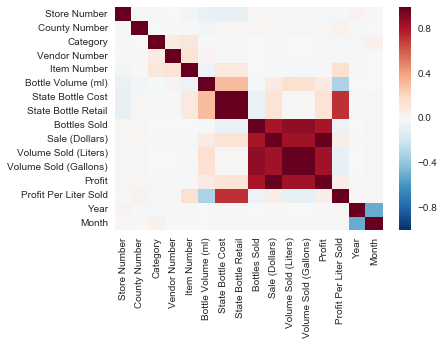

In [53]:
sns.heatmap(djs.corr())

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [6]:
from sklearn import linear_model


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.